# 利用GPT大型模型工具完成数据洞察

本周以及下周的实验内容如下：
请同学们参考《GPT数据科学系列课程实验手册》内容，并结合之前的作业经验，对GitHub上具有协作行为日志数据的500名用户的个人信息（包括姓名、公司、邮箱及其地理位置等）进行数据洞察分析。数据获取链接为：https://github.com/X-lab2017/dase-2024-autumn/tree/main/HomeWork/data/user_data

- 实验目标
培养数据处理与分析能力：通过实际操作，提升对大规模数据集的处理和分析能力。  
掌握GPT工具的应用：学习如何利用GPT大型模型工具辅助完成数据洞察任务。  
理解数据隐私与伦理：在处理包含个人信息的数据时，遵循数据隐私保护的原则和规范。  
- 实验内容  
人口统计分析  
国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。  
城市级别分布：分析主要城市的开发者密度，发现技术热点区域。  
时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。  
协作行为分析  
提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。  
其他维度有趣的洞察（至少2个）  
提交内容  
数据分析代码。  
最终的数据洞察报告（PDF格式）。  

In [28]:
data

,user_id,name,location,total_influence,country,event_type,event_action,event_time,hour_of_day,timezone_offset,local_time,local_hour
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00,20,+0800,2024-11-27 04:28:37+08:00,4
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00,20,+0800,2024-11-27 04:42:57+08:00,4
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00,4,+0800,2024-11-27 12:10:46+08:00,12
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00,17,+0800,2024-11-28 01:43:50+08:00,1
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00,19,+0800,2024-11-28 03:56:34+08:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2589547,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-04 15:51:52+08:00,15,+0800,2024-10-04 23:51:52+08:00,23
2589548,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-15 11:34:32+08:00,11,+0800,2024-10-15 19:34:32+08:00,19
2589549,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-16 07:04:20+08:00,7,+0800,2024-10-16 15:04:20+08:00,15
2589550,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-07 14:36:44+08:00,14,+0800,2024-10-07 22:36:44+08:00,22


In [1]:
#将git中的7个文件信息合并到一起
import pandas as pd
import os
folder_path = "D:\VScode\Dase_Introduction\homework12\data"
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
combined_data = pd.DataFrame()
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    combined_data = pd.concat([combined_data, df], ignore_index=True)
# 定义合并后文件在原文件夹内的保存路径
save_path = os.path.join(folder_path, "concated_data.csv")
combined_data.to_csv(save_path, index=False)

### 1、国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。  

United States           611576
Germany                 365318
China                   146022
United Kingdom          143212
France                  119140
Canada                  117200
Netherlands             104734
Czechia                  96244
Japan                    93106
Switzerland              76186
Australia                71492
Italy                    61342
Poland                   40004
New Zealand              36888
Spain                    29878
Austria                  23516
Sweden                   19702
Finland                  17630
Denmark                  14824
Bulgaria                 14714
Hungary                  14160
Belgium                  13256
Norway                   12008
India                    11378
United Arab Emirates     10528
Singapore                10410
Brazil                   10044
Hong Kong                 9534
Malaysia                  9076
Pakistan                  8924
Indonesia                 8496
Russia                    8174
Taiwan  

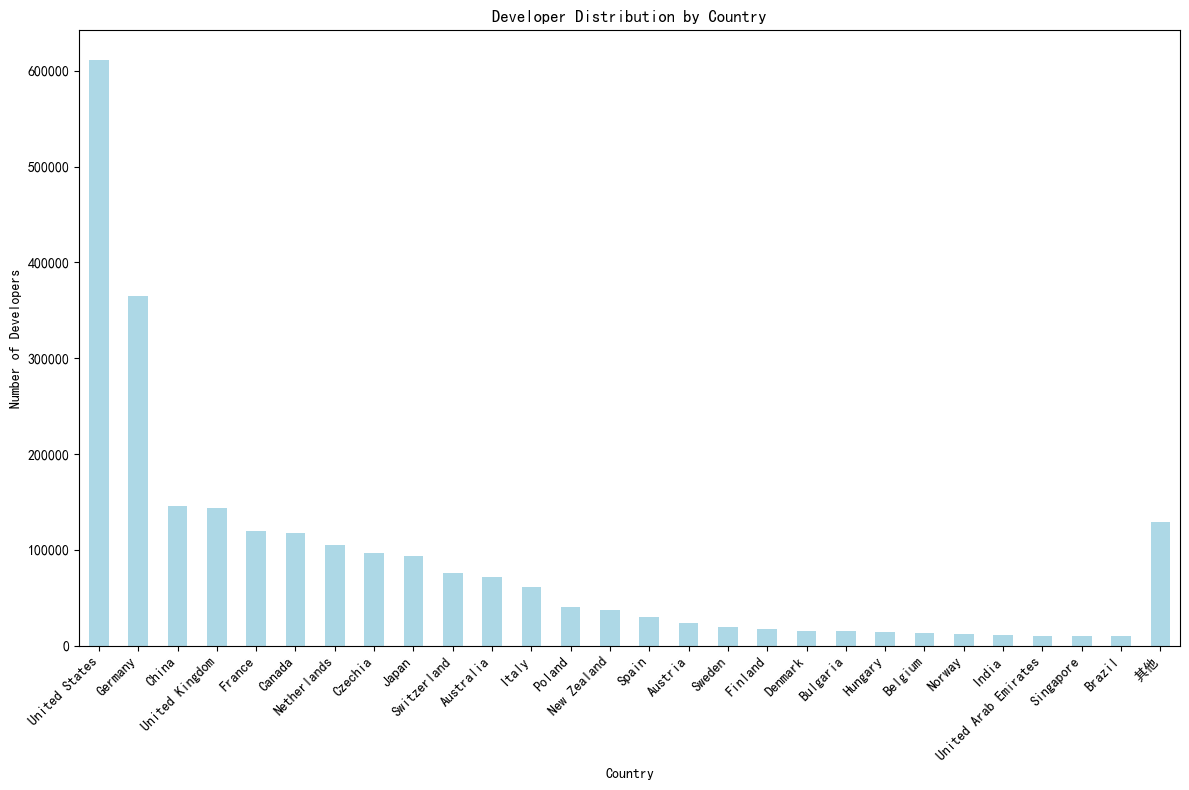

In [32]:
#国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
matplotlib.rcParams['font.family'] = 'SimHei'

# 读取合并后的文件

data = pd.read_csv("data\concated_data.csv")

# 统计每个国家出现的次数
country_counts = data['country'].value_counts()
print(country_counts)

# 设定阈值，将开发者数量小于一定值的国家归为“其他”类别，这里阈值设为10000
threshold = 10000
major_countries = country_counts[country_counts >= threshold]
minor_countries = country_counts[country_counts < threshold]
minor_count_sum = minor_countries.sum()
major_countries['其他'] = minor_count_sum

# 绘制柱状图
ax = major_countries.plot(kind='bar', figsize=(12, 8),color='lightblue')
ax.set_title('Developer Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Developers')

# 数据量级差异太大，取对数
if (major_countries.max() / major_countries.min()) > 100:
    ax.set_yscale('log')
# 旋转x轴标签角度，这里旋转45度，水平对齐方式设为右对齐（ha='right'），让标签更清晰
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# 将country_counts转换为country_dist
country_dist = country_counts.reset_index()
country_dist.columns = ['country', 'user_count']

# 绘制国家分布的地图
fig = px.choropleth(
    country_dist,
    locations="country",
    locationmode="country names",
    color="user_count",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Global User Distribution by Country"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular"
    )
)

fig.show()


### 2、城市级别分布：分析主要城市的开发者密度，发现技术热点区域。 

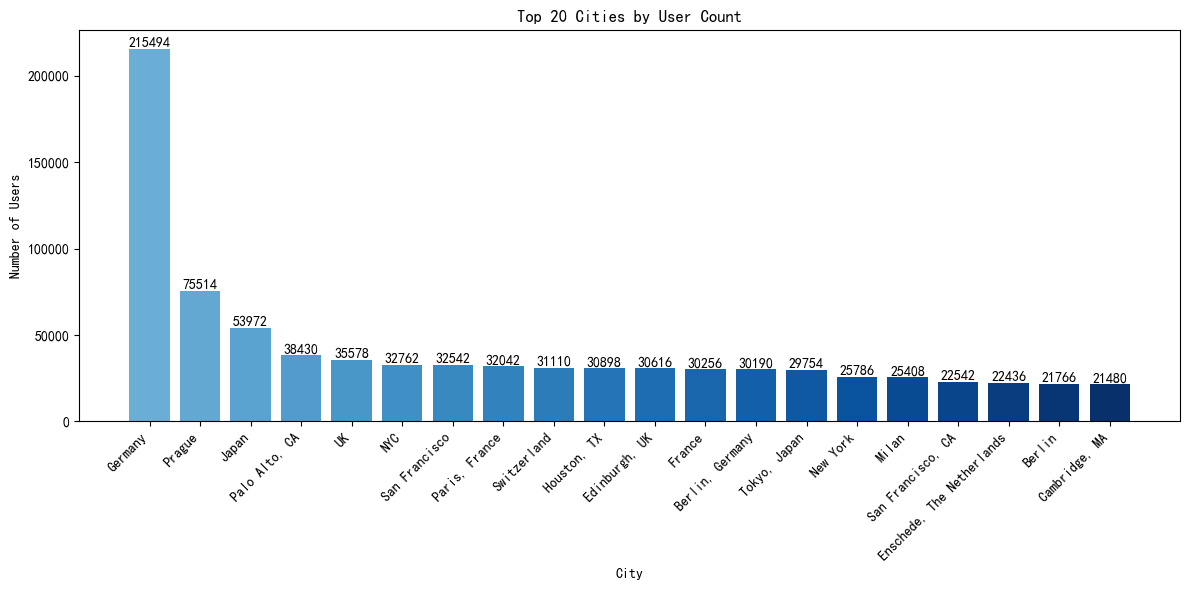

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 数据导入与清理
data_path = "data/concated_data.csv"
data = pd.read_csv(data_path)

# 城市级别分布
city_dist = data['location'].value_counts().head(20)  # 显示前20个城市

# 绘制柱状图
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(city_dist)), city_dist.values, color=plt.cm.Blues(np.linspace(0.5, 1, len(city_dist))), align='center')

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# 设置图表标题和标签
plt.xticks(range(len(city_dist)), city_dist.index, rotation=45, ha='right')
plt.title('Top 20 Cities by User Count')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

In [34]:
data

,user_id,name,location,total_influence,country,event_type,event_action,event_time
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00
...,...,...,...,...,...,...,...,...
2589547,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-04 15:51:52+08:00
2589548,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-15 11:34:32+08:00
2589549,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-16 07:04:20+08:00
2589550,1819009,loicmathieu,"Lille, France",338.532318,France,PullRequestReviewEvent,created,2024-10-07 14:36:44+08:00


### 3、时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。  

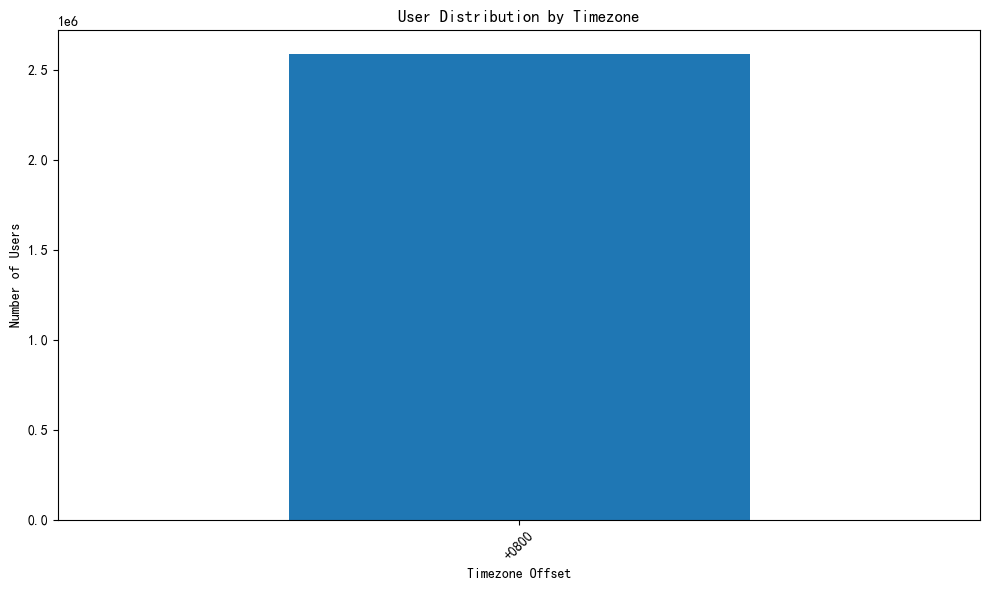

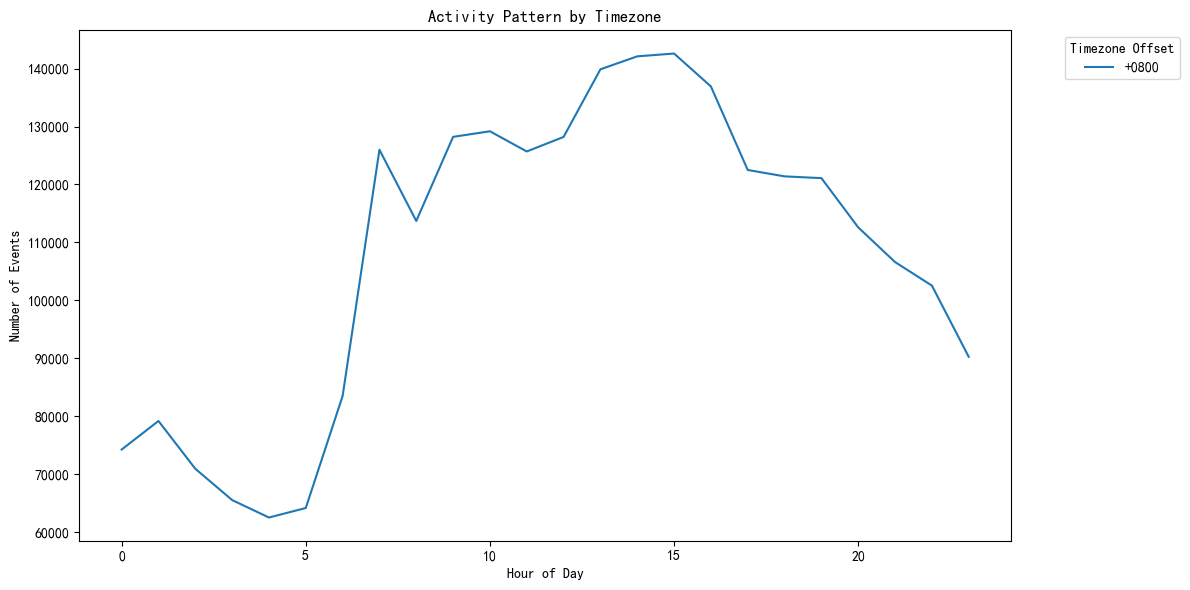

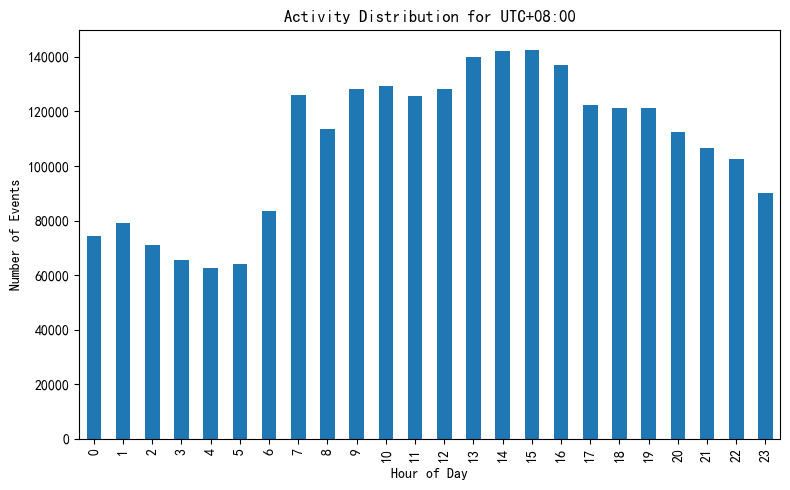

In [36]:


# 转换 event_time 为 datetime 类型
data['event_time'] = pd.to_datetime(data['event_time'])

# 提取用户时区偏移量，假设已经有'local_time'列记录用户时区信息
data['timezone_offset'] = data['event_time'].dt.strftime('%z')  # 获取时区偏移量

# 如果没有'timezone_offset'字段，可以根据event_time来推断时区
# 假设所有时间戳已包含时区信息，直接从event_time中提取
data['local_hour'] = data['event_time'].dt.hour  # 提取本地小时部分

# 按照时区偏移统计用户分布
timezone_counts = data['timezone_offset'].value_counts().sort_index()

# 绘制时区分布
plt.figure(figsize=(10,6))
timezone_counts.plot(kind='bar')
plt.title('User Distribution by Timezone')
plt.xlabel('Timezone Offset')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 分析活动时间模式：按时区和小时统计事件数量
# 对数据按时区和小时进行分组，并计算每个分组的事件次数
timezone_hourly_activity = data.groupby(['timezone_offset', 'local_hour']).size().unstack(fill_value=0)

# 可视化不同时区的活动模式
plt.figure(figsize=(12, 6))
for timezone in timezone_hourly_activity.index:
    plt.plot(timezone_hourly_activity.columns, timezone_hourly_activity.loc[timezone], label=timezone)

plt.title('Activity Pattern by Timezone')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='Timezone Offset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 如果你希望进一步分析某个特定时区的活跃情况，例如 'UTC+08:00'
specific_timezone_data = data[data['timezone_offset'] == '+0800']
specific_timezone_activity = specific_timezone_data.groupby('local_hour').size()

# 可视化特定时区的活动分布
plt.figure(figsize=(8, 5))
specific_timezone_activity.plot(kind='bar')
plt.title('Activity Distribution for UTC+08:00')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()


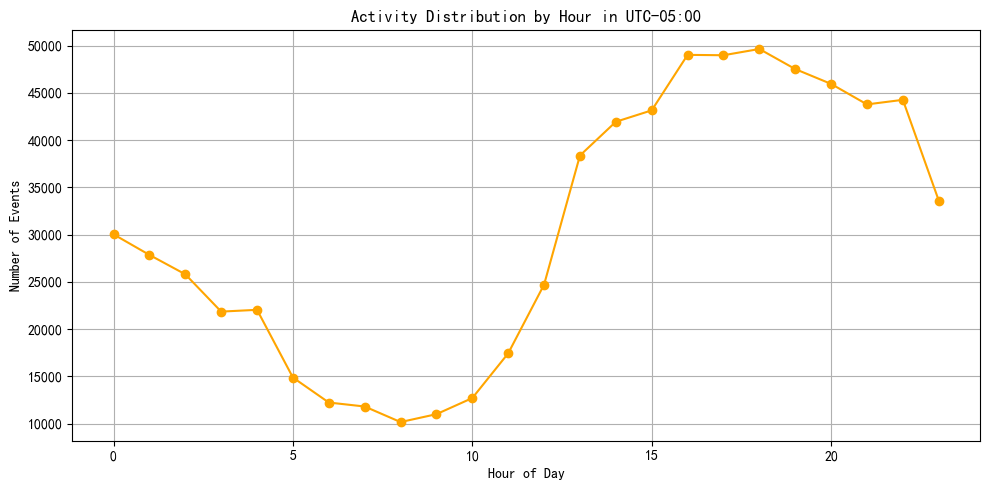

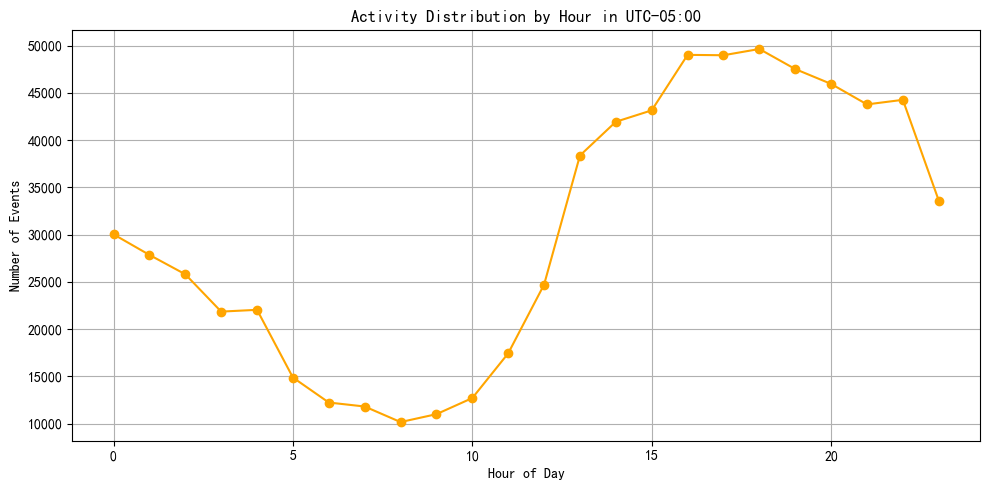

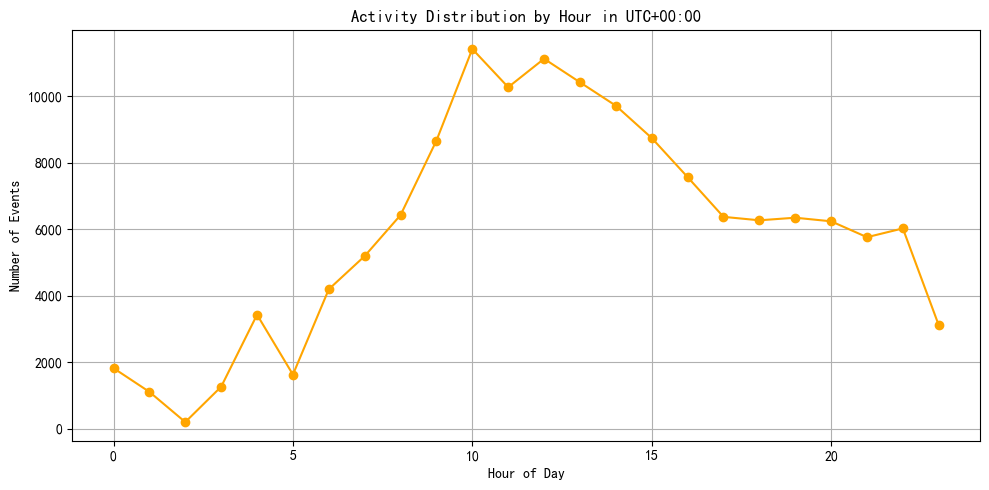

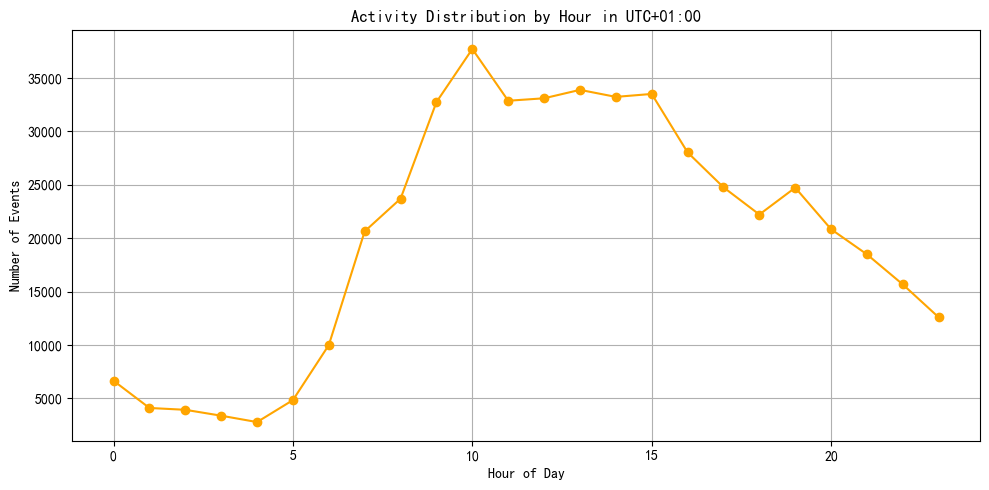

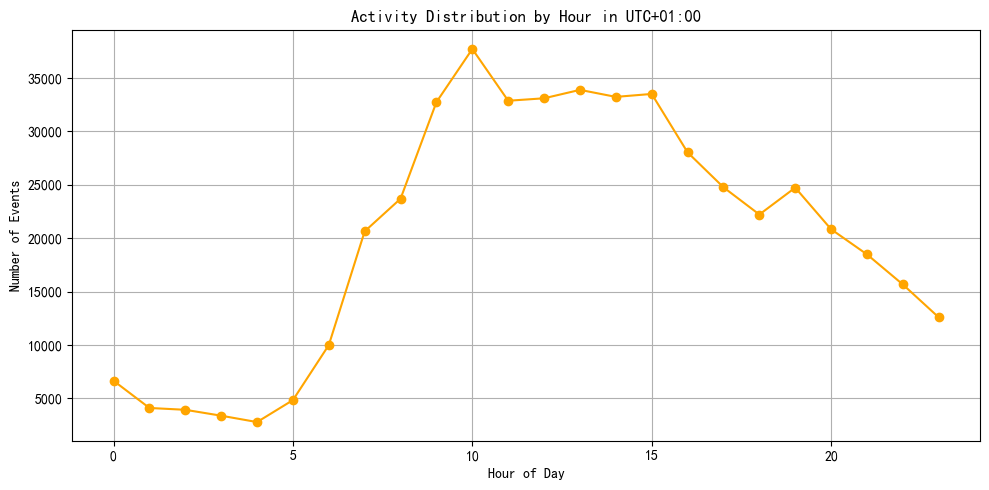

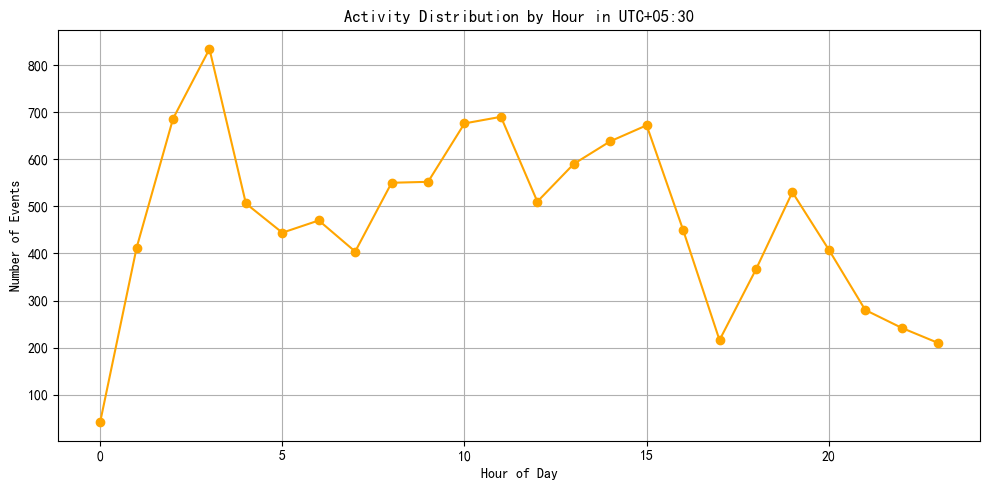

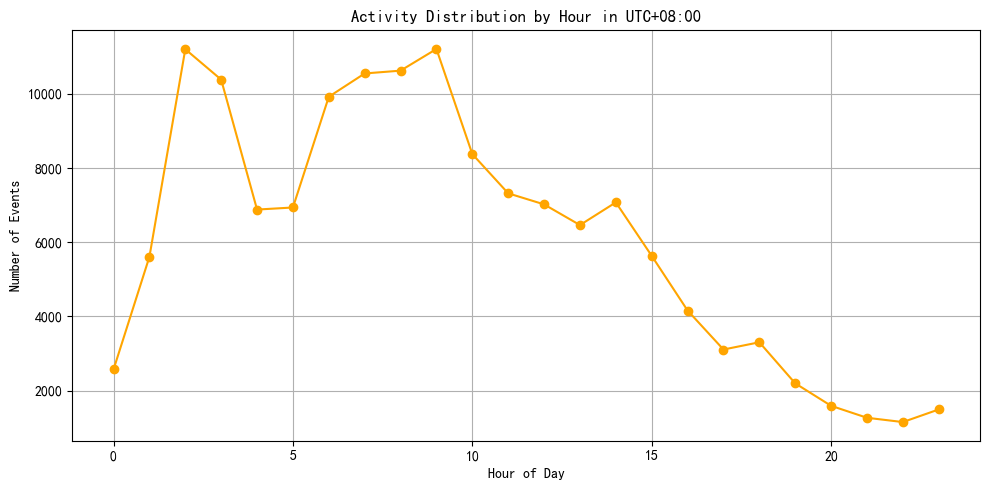

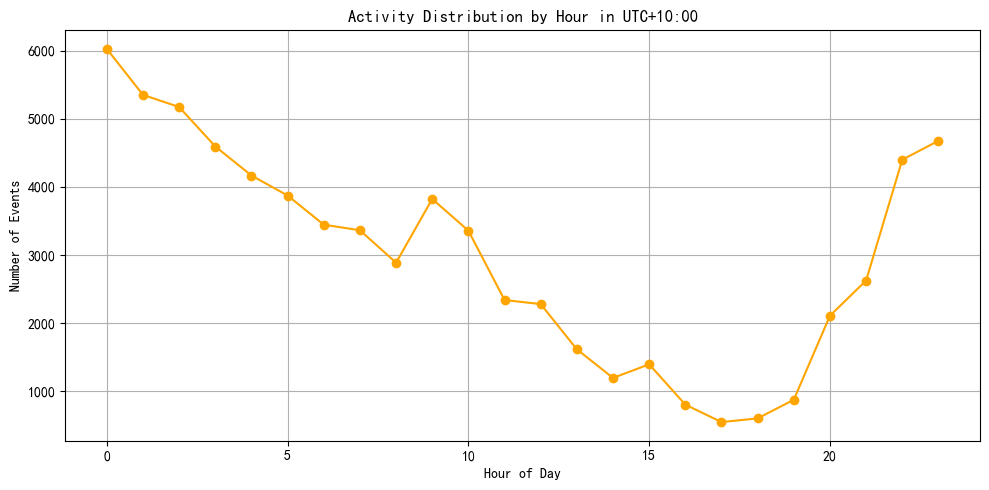

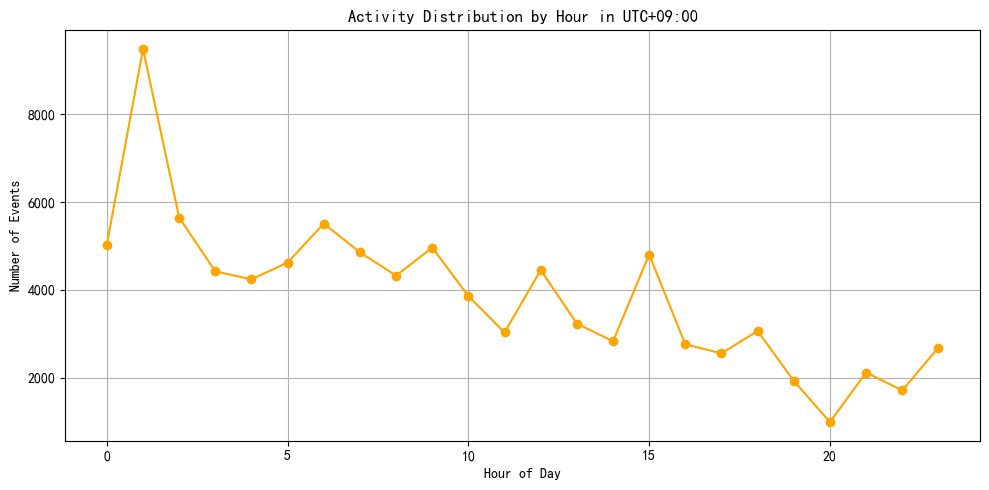

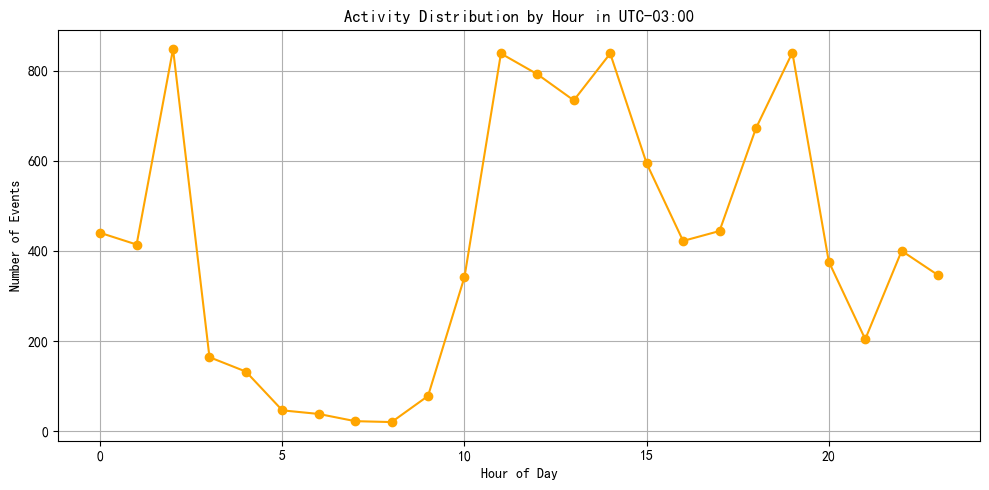

In [38]:
country_timezone_dict = {
    'United States': 'UTC-05:00',  # 例如东部时间
    'Canada': 'UTC-05:00',         # 例如东部时间
    'United Kingdom': 'UTC+00:00', # 英国标准时间
    'Germany': 'UTC+01:00',        # 中欧时间
    'France': 'UTC+01:00',         # 中欧时间
    'India': 'UTC+05:30',          # 印度标准时间
    'China': 'UTC+08:00',          # 中国标准时间
    'Australia': 'UTC+10:00',      # 澳大利亚东部时间
    'Japan': 'UTC+09:00',          # 日本标准时间
    'Brazil': 'UTC-03:00'          # 巴西时间
}

# 先将event_time列转换为字符串类型（方便后续格式检查等操作）
data['event_time'] = data['event_time'].astype(str)
valid_data = data[data['event_time'].str.len() > 10]
valid_data['event_time'] = pd.to_datetime(valid_data['event_time'])

# 补充其时区信息
valid_data['timezone'] = valid_data['country'].map(country_timezone_dict)

# 选取的十个国家对应的时区列表
timezones = list(country_timezone_dict.values())

# 循环处理每个时区的数据，展示其不同小时的事件分布情况
for timezone in timezones:
    timezone_data = valid_data[valid_data['timezone'] == timezone]
    hourly_dist = timezone_data['event_time'].dt.hour.value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.plot(hourly_dist.index, hourly_dist.values, marker='o', color='orange')
    plt.title(f'Activity Distribution by Hour in {timezone}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Events')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 4、提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。 

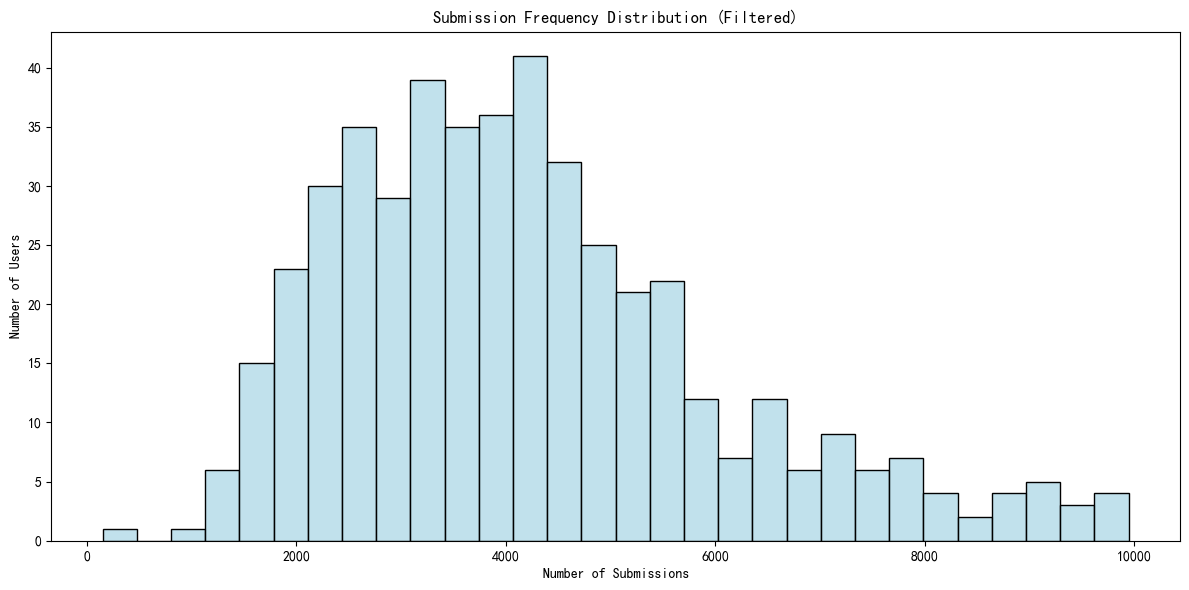

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


user_activity = data.groupby('user_id')['event_action'].count().sort_values(ascending=False)
user_activity = user_activity.replace([float('inf'), -float('inf')], pd.NA).dropna()
plt.figure(figsize=(12, 6))
sns.histplot(user_activity[user_activity < user_activity.quantile(0.95)], bins=30, kde=False, color='lightblue')
plt.title('Submission Frequency Distribution (Filtered)')
plt.xlabel('Number of Submissions')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

### 5、其他数据洞察

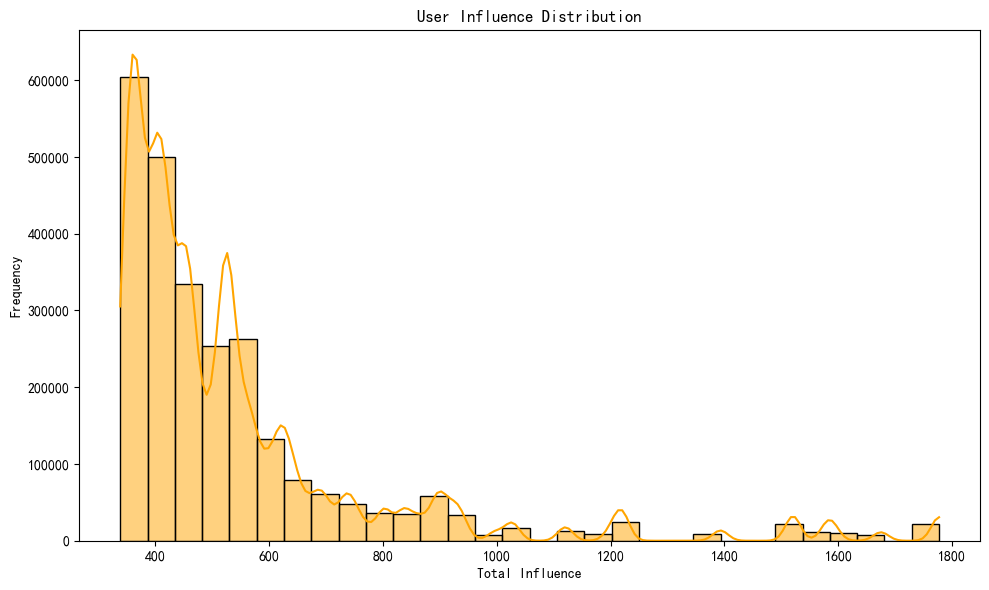

In [19]:

# (1) 用户影响力分布
plt.figure(figsize=(10, 6))
data['total_influence'] = data['total_influence'].replace([float('inf'), -float('inf')], pd.NA).dropna()
sns.histplot(data['total_influence'], bins=30, kde=True, color='orange')
plt.title('User Influence Distribution')
plt.xlabel('Total Influence')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


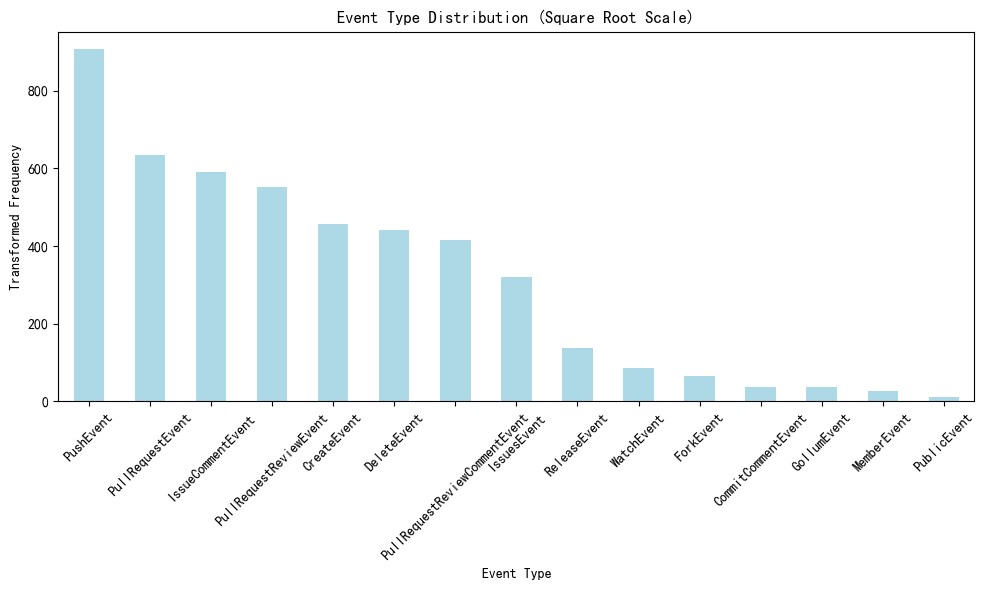

In [21]:

# (2) 事件类型分布
event_type_dist = data['event_type'].value_counts()
plt.figure(figsize=(10, 6))
sqrt_event_type_dist = event_type_dist.apply(lambda x: max(x, 1)**0.5)  # 平滑处理
sqrt_event_type_dist.plot(kind='bar', color='lightblue')
plt.title('Event Type Distribution (Square Root Scale)')
plt.xlabel('Event Type')
plt.ylabel('Transformed Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()